'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Read the CSV file into a DataFrame
df_00 = pd.read_csv('/content/drive/MyDrive/clustered_data.csv')
df, df_unseen = train_test_split(df_00, test_size = 0.1, random_state=42, stratify=df_00['cluster'])

In [ ]:
# Calculate the range of 'example_column'
column_range = df['cluster'].max() - df['cluster'].min()
print(column_range)

99


In [ ]:
df['cluster'] ==64

KeyError: 'cluster'

In [ ]:
from IPython.display import display

display(df)

,latitude,longitude,accommodates,beds,price,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,cluster
75649,40.713900,-74.038036,4,1,199,0,4.91,4.93,4.89,4.97,4.90,4.84,1.08,1.0,2
71842,39.745267,-104.974896,3,1,66,0,4.93,4.97,4.95,4.98,4.89,4.88,0.30,1.0,80
207675,47.608279,-122.330229,2,1,134,0,4.00,4.50,4.53,3.00,3.50,3.89,0.41,1.0,65
63084,39.931220,-82.981978,6,3,115,0,4.41,5.00,4.73,4.66,4.55,4.66,1.51,2.5,17
3245,35.494328,-82.515766,2,3,57,0,5.00,4.95,4.98,5.00,4.67,4.90,0.03,1.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,34.051290,-118.242500,3,2,193,42,4.60,4.67,4.60,4.69,4.38,4.52,2.27,1.0,71
98281,34.161150,-118.589820,2,2,115,68,4.97,5.00,4.99,5.00,4.94,4.96,3.93,1.5,72
202552,36.973340,-121.950210,2,1,191,272,4.92,4.90,4.97,4.98,4.98,4.79,10.49,1.0,59
91976,34.017520,-118.316310,2,2,90,8,5.00,5.00,5.00,5.00,4.63,4.63,0.29,1.0,71


In [ ]:
X = df.drop('price', axis=1)  # X contains all columns except 'price'
y = df['price']     # y is the target variable

# Split data into training, calibration, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42, stratify = X['cluster'])
X_calib, X_test, y_calib, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify = X_temp['cluster'])

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize and train the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, n_estimators = 300, gamma=0.1)
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 67.04611460272605
Mean Squared Error: 11131.534292556555
R^2 Score: 0.5468836161892261


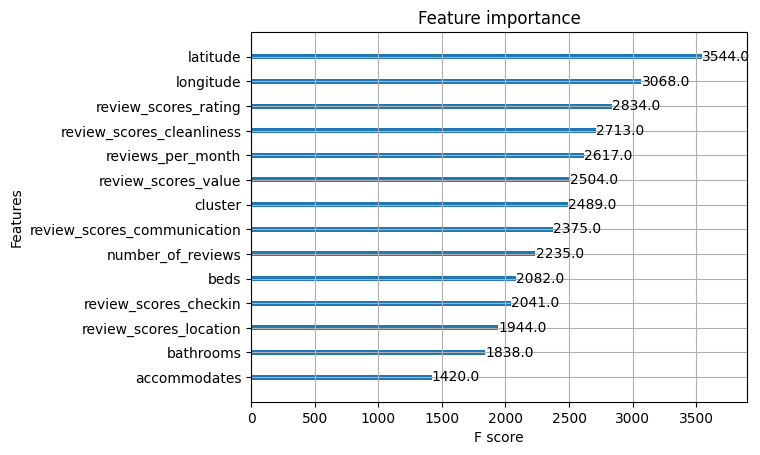

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plot_importance(xg_reg)
plt.show()

In [ ]:
# Predict on calibration data
y_calib_pred = xg_reg.predict(X_calib)

In [ ]:
# Calculate conformity scores (absolute errors)
conformity_scores = np.abs(y_calib_pred - y_calib)

# Determine the quantile for the prediction interval
# For a 90% prediction interval
alpha = 0.1
quantile = np.quantile(conformity_scores, 1 - alpha)

In [ ]:
# Predict on calibration data
y_calib_pred = xg_reg.predict(X_calib)

# Calculate conformity scores (absolute errors)
conformity_scores = np.abs(y_calib_pred - y_calib)

# Determine the quantile for the prediction interval
# For a 90% prediction interval
alpha = 0.1
quantile = np.quantile(conformity_scores, 1 - alpha)

# Predict on test data
y_test_pred = xg_reg.predict(X)

# Calculate prediction intervals
lower_bounds = y_test_pred - quantile
upper_bounds = y_test_pred + quantile

In [ ]:
quantile

In [ ]:
# Predict on test data
y_test_pred = xg_reg.predict(X)

# Calculate prediction intervals
lower_bounds = y_test_pred - quantile
upper_bounds = y_test_pred + quantile

In [ ]:
# Check if true y values fall within the prediction intervals
inside_interval = (y >= lower_bounds) & (y <= upper_bounds)

In [ ]:
inside_interval

75649     True
71842     True
207675    True
63084     True
3245      True
          ... 
99985     True
98281     True
202552    True
91976     True
69315     True
Name: price, Length: 198416, dtype: bool

In [ ]:
labels = []
for index, row in X.iterrows():
    inside = inside_interval[index]  # Get corresponding boolean value
    label = 1 if inside else 0  # Assign label 1 if inside is True, otherwise 0
    labels.append(label)

# Add the LABEL column to the DataFrame
X['LABEL'] = labels

In [ ]:
X.to_csv('NC_data.csv', index=False)

In [ ]:
display(X)

,latitude,longitude,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms,cluster,LABEL
75649,40.713900,-74.038036,4,1,0,4.91,4.93,4.89,4.97,4.90,4.84,1.08,1.0,2,1
71842,39.745267,-104.974896,3,1,0,4.93,4.97,4.95,4.98,4.89,4.88,0.30,1.0,80,1
207675,47.608279,-122.330229,2,1,0,4.00,4.50,4.53,3.00,3.50,3.89,0.41,1.0,65,1
63084,39.931220,-82.981978,6,3,0,4.41,5.00,4.73,4.66,4.55,4.66,1.51,2.5,17,1
3245,35.494328,-82.515766,2,3,0,5.00,4.95,4.98,5.00,4.67,4.90,0.03,1.0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,34.051290,-118.242500,3,2,42,4.60,4.67,4.60,4.69,4.38,4.52,2.27,1.0,71,1
98281,34.161150,-118.589820,2,2,68,4.97,5.00,4.99,5.00,4.94,4.96,3.93,1.5,72,1
202552,36.973340,-121.950210,2,1,272,4.92,4.90,4.97,4.98,4.98,4.79,10.49,1.0,59,1
91976,34.017520,-118.316310,2,2,8,5.00,5.00,5.00,5.00,4.63,4.63,0.29,1.0,71,1


In [ ]:
# display(X)

In [ ]:
# Calculate the portion of the 'LABEL' column that is set to 1
portion_label_1 = X['LABEL'].mean()

print(f"The portion of the 'LABEL' column set to 1 is: {portion_label_1}")

The portion of the 'LABEL' column set to 1 is: 0.9107884444802838


In [ ]:
import pandas as pd
import folium

# Calculate the percentage of True values and mean coordinates for each cluster
cluster_info = X.groupby('cluster').agg(
    latitude_mean=('latitude', 'mean'),
    longitude_mean=('longitude', 'mean'),
    true_percentage=('LABEL', lambda x: (x.sum() / x.count()) * 100)
).reset_index()

# Initialize the map
map_us = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

# Define a function to determine marker color based on percentage of True values
def get_color(true_percentage):
    if true_percentage > 88:
        return '#0000ff'  # Blue
    elif true_percentage > 85:
        return '#008000'  # Green
    else:
        return '#FFA500'  # Orange

# Add markers for each cluster
for _, row in cluster_info.iterrows():
    folium.CircleMarker(
        location=[row['latitude_mean'], row['longitude_mean']],
        radius=5,  # Fixed size, but you could adjust this based on true_percentage if desired
        popup=f"Cluster {int(row['cluster'])}, True %: {row['true_percentage']:.2f}",
        color=get_color(row['true_percentage']),
        fill=True,
        fill_color=get_color(row['true_percentage'])
    ).add_to(map_us)

# Display the map
map_file_path = 'nonCC_heat_map_by_cluster.html'
map_us.save(map_file_path)

In [ ]:
import pandas as pd

# Count the number of observations for each cluster
observations_per_cluster = X.groupby('cluster').size()

# Convert to DataFrame for better readability (optional)
observations_per_cluster_df = observations_per_cluster.reset_index(name='Number of Observations')

# Display the result
display(observations_per_cluster_df)


,cluster,Number of Observations
0,0,413
1,1,2574
2,2,1459
3,3,322
4,4,4748
...,...,...
95,95,155
96,96,488
97,97,1222
98,98,5492


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load your data
df = X

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Load U.S. states boundary shapefile (assuming it's stored locally or using a direct link)
# You can download state shapefiles from the U.S. Census Bureau or use an API.
# Here, let's assume we have it at '/path/to/us_states.shp'. You need to replace this path or download it.
states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip')

# Ensure both GeoDataFrames use the same CRS
gdf = gdf.set_crs(states.crs)

# Spatial join points to states
merged = gpd.sjoin(gdf, states, how="left", op='intersects')

# Calculate the True Rate for 'LABEL' by state
true_rate_by_state = merged.groupby('NAME')['LABEL'].mean() * 100  # Convert to percentage


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
# Display the results
display(true_rate_by_state)

NAME
Arizona                  50.000000
California               91.078110
Colorado                 93.970656
District of Columbia     95.003799
Florida                  84.719887
Illinois                 94.476863
Louisiana                91.648000
Maryland                100.000000
Massachusetts            93.439227
Minnesota                90.347667
Montana                  93.469388
Nevada                   87.462687
New Jersey               95.281690
New York                 93.075456
North Carolina           93.011527
Ohio                     93.911917
Oregon                   96.069423
Rhode Island             84.062878
Tennessee                91.375016
Texas                    90.584844
Washington               95.368457
Wisconsin                80.645161
Name: LABEL, dtype: float64

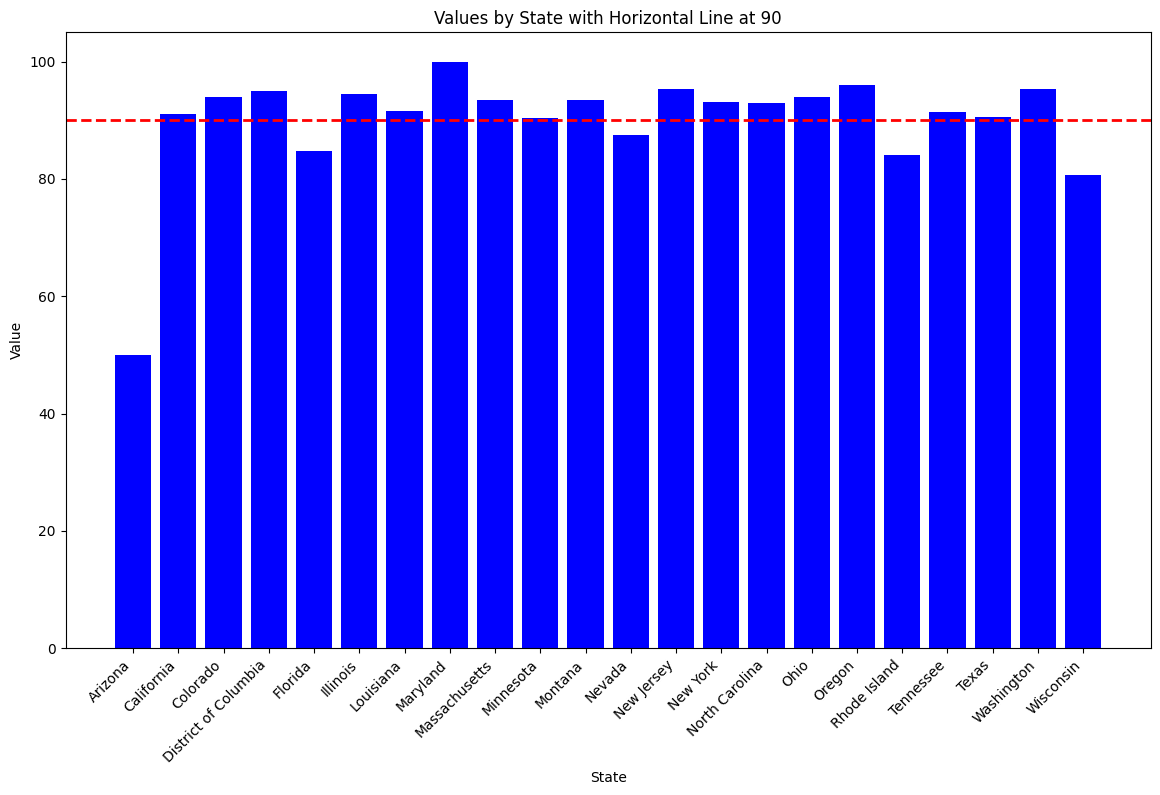

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data for the latest input
data = {
    'Arizona': 50.000000,
    'California': 91.078110,
    'Colorado': 93.970656,
    'District of Columbia': 95.003799,
    'Florida': 84.719887,
    'Illinois': 94.476863,
    'Louisiana': 91.648000,
    'Maryland': 100.000000,
    'Massachusetts': 93.439227,
    'Minnesota': 90.347667,
    'Montana': 93.469388,
    'Nevada': 87.462687,
    'New Jersey': 95.281690,
    'New York': 93.075456,
    'North Carolina': 93.011527,
    'Ohio': 93.911917,
    'Oregon': 96.069423,
    'Rhode Island': 84.062878,
    'Tennessee': 91.375016,
    'Texas': 90.584844,
    'Washington': 95.368457,
    'Wisconsin': 80.645161
}

# Convert the dictionary to a pandas Series
df = pd.Series(data)

# Creating the bar plot
plt.figure(figsize=(14, 8))
plt.bar(df.index, df.values, color='blue')

# Adding a horizontal line at y=90
plt.axhline(y=90, color='r', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Values by State with Horizontal Line at 90')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
